In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# Load your data
df = pd.read_csv("final_airbnb_dataset.csv")

In [15]:
features = [
    'distance_score', 'price_score', 'number_of_reviews',
    'availability_365', 'review_scores_rating',
]

df_model = df.dropna(subset=features + ['booked'])

In [18]:
X = df_model[features]
y = df_model['booked'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_full_scaled = scaler.transform(X)

# Train logistic regression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000)

In [19]:
probs = logreg.predict_proba(X_full_scaled)[:, 1]  # Probabilities for class '1'

# Add predictions to the dataframe
df_model = df_model.copy()
df_model['predicted_proba'] = probs

# Get top 10 listings
top_10 = df_model.sort_values(by='predicted_proba', ascending=False).head(10)
top_10_links = top_10[['id', 'listing_url', 'predicted_proba']]

print("\n🔝 Top 10 Recommended Airbnbs:\n")
for i, row in top_10_links.iterrows():
    print(f"Score: {row['predicted_proba']:.2f} | URL: {row['listing_url']}")


🔝 Top 10 Recommended Airbnbs:

Score: 1.00 | URL: https://www.airbnb.com/rooms/1513777
Score: 1.00 | URL: https://www.airbnb.com/rooms/40777849
Score: 1.00 | URL: https://www.airbnb.com/rooms/39859670
Score: 1.00 | URL: https://www.airbnb.com/rooms/839415800079955074
Score: 1.00 | URL: https://www.airbnb.com/rooms/844029641961371023
Score: 1.00 | URL: https://www.airbnb.com/rooms/40083498
Score: 1.00 | URL: https://www.airbnb.com/rooms/40113121
Score: 1.00 | URL: https://www.airbnb.com/rooms/40182687
Score: 1.00 | URL: https://www.airbnb.com/rooms/40448201
Score: 1.00 | URL: https://www.airbnb.com/rooms/832548311451530382


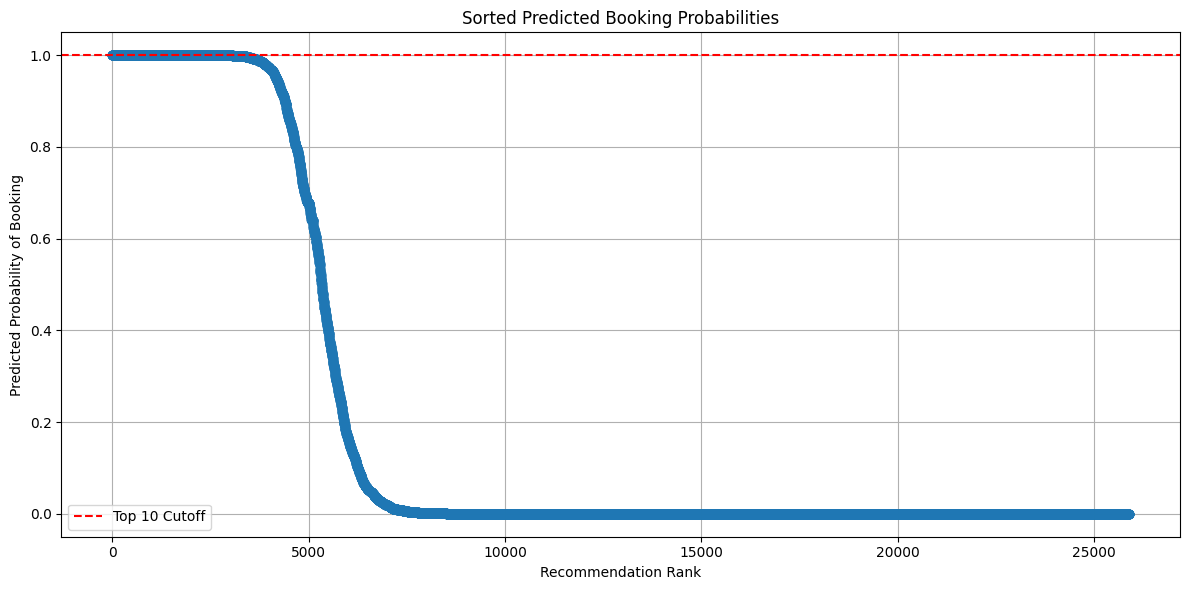

In [20]:
plt.figure(figsize=(12, 6))
sorted_probs = df_model['predicted_proba'].sort_values(ascending=False).reset_index(drop=True)
plt.plot(sorted_probs, marker='o', linestyle='', alpha=0.6)
plt.axhline(top_10['predicted_proba'].min(), color='red', linestyle='--', label="Top 10 Cutoff")
plt.title('Sorted Predicted Booking Probabilities')
plt.xlabel('Recommendation Rank')  # Rename as needed
plt.ylabel('Predicted Probability of Booking')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()